# Python Project - Loan Perfomance Data Analysis With Pandas
## by Nanyak Famwang

## Introduction
> This dataset is a loan repayment dataset whose unique personal identifers have been removed. The dataset (113937x81) is made of eighty-one attributes associated with borrowers, loan terms, credit history, repayment performance, etc. The primary objective here is carrying out loan performance analysis with a focus on the these metrics\:
- Investigating the relationship between borrower characteristics (e.g., credit score, income) and loan performance metrics (e.g., default rates, on-time payments)\.
- Compare the performance of loans across different loan statuses (e.g., completed, charged off) to identify patterns and trends.
- Analyze the impact of loan terms (e.g., APR, loan amount) on loan outcomes and investor returns.

## Dataset Source:
> The dataset was gotten from a data analyst bootcamp I took part in, as one of the projects of the course. It includes data that encompasses 113937 loan applications.

## Objective:
> This dataset is analyzed to understand the factors influencing loan repayment performance and to develop predictive models that can accurately assess the likelihood of successful loan repayment. Identifying patterns and trends within the data will allow us to improve the institution's decision-making process for approving loan applications and managing credit risk effectively.



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Preliminary Wrangling

In [3]:
# import all packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
col_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [5]:
dfs = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Project Python/Python Project 5.xlsx', sheet_name=['prosperLoanData','Variables description'])
df1 = dfs['prosperLoanData']
df2 = dfs['Variables description']

In [6]:
df2

Variable  \
0                            ListingKey   
1                         ListingNumber   
2                   ListingCreationDate   
3                           CreditGrade   
4                                  Term   
5                            LoanStatus   
6                            ClosedDate   
7                           BorrowerAPR   
8                          BorrowerRate   
9                           LenderYield   
10              EstimatedEffectiveYield   
11                        EstimatedLoss   
12                      EstimatedReturn   
13              ProsperRating (numeric)   
14                ProsperRating (Alpha)   
15                         ProsperScore   
16                      ListingCategory   
17                        BorrowerState   
18                           Occupation   
19                     EmploymentStatus   
20             EmploymentStatusDuration   
21                  IsBorrowerHomeowner   
22                     CurrentlyInGroup   
23                             GroupKey   
24                     DateCreditPulled   
25                CreditScoreRangeLower   
26                CreditScoreRangeUpper   
27              FirstRecordedCreditLine   
28                   CurrentCreditLines   
29                      OpenCreditLines   
30           TotalCreditLinespast7years   
31                OpenRevolvingAccounts   
32          OpenRevolvingMonthlyPayment   
33                 InquiriesLast6Months   
34                       TotalInquiries   
35                 CurrentDelinquencies   
36                     AmountDelinquent   
37              DelinquenciesLast7Years   
38             PublicRecordsLast10Years   
39            PublicRecordsLast12Months   
40               RevolvingCreditBalance   
41                  BankcardUtilization   
42              AvailableBankcardCredit   
43                          TotalTrades   
44                TradesNeverDelinquent   
45              TradesOpenedLast6Months   
46                    DebtToIncomeRatio   
47                          IncomeRange   
48                     IncomeVerifiable   
49                  StatedMonthlyIncome   
50                              LoanKey   
51                    TotalProsperLoans   
52           TotalProsperPaymentsBilled   
53                OnTimeProsperPayments   
54  ProsperPaymentsLessThanOneMonthLate   
55      ProsperPaymentsOneMonthPlusLate   
56             ProsperPrincipalBorrowed   
57          ProsperPrincipalOutstanding   
58          ScorexChangeAtTimeOfListing   
59            LoanCurrentDaysDelinquent   
60        LoanFirstDefaultedCycleNumber   
61           LoanMonthsSinceOrigination   
62                           LoanNumber   
63                   LoanOriginalAmount   
64                  LoanOriginationDate   
65               LoanOriginationQuarter   
66                            MemberKey   
67                   MonthlyLoanPayment   
68                  LP_CustomerPayments   
69         LP_CustomerPrincipalPayments   
70                   LP_InterestandFees   
71                       LP_ServiceFees   
72                    LP_CollectionFees   
73                LP_GrossPrincipalLoss   
74                  LP_NetPrincipalLoss   
75      LP_NonPrincipalRecoverypayments   
76                        PercentFunded   
77                      Recommendations   
78           InvestmentFromFriendsCount   
79          InvestmentFromFriendsAmount   
80                            Investors   

                                          Description  
0   Unique key for each listing, same value as the...  
1   The number that uniquely identifies the listin...  
2                   The date the listing was created.  
3   The Credit rating that was assigned at the tim...  
4         The length of the loan expressed in months.  
5   The current status of the loan: Cancelled, Cha...  
6   Closed date is applicable for Cancelled, Compl...  
7   The Borrower's Annual Percentage Rate (APR) fo...  


In [7]:
df1

ListingKey  ListingNumber     ListingCreationDate  \
0       1021339766868145413AB3B         193129 2007-08-26 19:09:29.263   
1       10273602499503308B223C1        1209647 2014-02-27 08:28:07.900   
2       0EE9337825851032864889A          81716 2007-01-05 15:00:47.090   
3       0EF5356002482715299901A         658116 2012-10-22 11:02:35.010   
4       0F023589499656230C5E3E2         909464 2013-09-14 18:38:39.097   
...                         ...            ...                     ...   
113932  E6D9357655724827169606C         753087 2013-04-14 05:55:02.663   
113933  E6DB353036033497292EE43         537216 2011-11-03 20:42:55.333   
113934  E6E13596170052029692BB1        1069178 2013-12-13 05:49:12.703   
113935  E6EB3531504622671970D9E         539056 2011-11-14 13:18:26.597   
113936  E6ED3600409833199F711B7        1140093 2014-01-15 09:27:37.657   

       CreditGrade  Term              LoanStatus ClosedDate  BorrowerAPR  \
0                C    36               Completed 2009-08-14      0.16516   
1              NaN    36                 Current        NaT      0.12016   
2               HR    36               Completed 2009-12-17      0.28269   
3              NaN    36                 Current        NaT      0.12528   
4              NaN    36                 Current        NaT      0.24614   
...            ...   ...                     ...        ...          ...   
113932         NaN    36                 Current        NaT      0.22354   
113933         NaN    36  FinalPaymentInProgress        NaT      0.13220   
113934         NaN    60                 Current        NaT      0.23984   
113935         NaN    60               Completed 2013-08-13      0.28408   
113936         NaN    36                 Current        NaT      0.13189   

        BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0             0.1580       0.1380                      NaN            NaN   
1             0.0920       0.0820                  0.07960         0.0249   
2             0.2750       0.2400                      NaN            NaN   
3             0.0974       0.0874                  0.08490         0.0249   
4             0.2085       0.1985                  0.18316         0.0925   
...              ...          ...                      ...            ...   
113932        0.1864       0.1764                  0.16490         0.0699   
113933        0.1110       0.1010                  0.10070         0.0200   
113934        0.2150       0.2050                  0.18828         0.1025   
113935        0.2605       0.2505                  0.24450         0.0850   
113936        0.1039       0.0939                  0.09071         0.0299   

        EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0                   NaN                      NaN                   NaN   
1               0.05470                      6.0                     A   
2                   NaN                      NaN                   NaN   
3               0.06000                      6.0                     A   
4               0.09066                      3.0                     D   
...                 ...                      ...                   ...   
113932          0.09500                      4.0                     C   
113933          0.08070                      6.0                     A   
113934          0.08578                      3.0                     D   
113935          0.15950                      4.0                     C   
113936          0.06081                      6.0                     A   

        ProsperScore  ListingCategory (numeric) BorrowerState  \
0                NaN                          0            CO   
1                7.0                          2            CO   
2                NaN                          0            GA   
3                9.0                         16            GA   
4                4.0                          2            MN   
...            

In [8]:
df1.shape

(113937, 81)


> This dataset is a 113937x81 dataset

> The main features of this dataset are that it contains
    
    Borrower characteristics such as:
        CreditScoreRangeLower
        CreditScoreRangeUpper
        StatedMonthlyIncome
        EmploymentStatus
        IsBorrowerHomeowner

    Loan Information:
        LoanOriginalAmount
        Term
        BorrowerRate
        ProsperRating (Alpha)

    Loan Performance:
        LoanStatus


> The features in the dataset that I will be working with to help support my investigation are: ListingKey, ListingCreationDate, Occupation, EmploymentStatus, Term, BorrowerRate, StatedMonthlyIncome, CreditScoreRangeUpper, IsBorrowerHomeowner, ListingCategory (numeric), LoanOriginalAmount, LoanOriginationDate, LoanStatus, ProsperRating (Alpha), DelinquenciesLast7Years


Since this is a loan performance analysis, the focus will mostly be on the relationship between the delinquencies and the other columns.

In [9]:
df1.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

The sum of null values in each column

In [10]:
df1.isna().sum()

ListingKey                                  0
ListingNumber                               0
ListingCreationDate                         0
CreditGrade                             84984
Term                                        0
LoanStatus                                  0
ClosedDate                              58848
BorrowerAPR                                25
BorrowerRate                                0
LenderYield                                 0
EstimatedEffectiveYield                 29084
EstimatedLoss                           29084
EstimatedReturn                         29084
ProsperRating (numeric)                 29084
ProsperRating (Alpha)                   29084
ProsperScore                            29084
ListingCategory (numeric)                   0
BorrowerState                            5515
Occupation                               3588
EmploymentStatus                         2255
EmploymentStatusDuration                 7625
IsBorrowerHomeowner               

In [11]:
# Make a copy of the original dataframe
df = df1.copy()

In [12]:
# columns to delete
# starting with null columns that hav values greater than 55000

columns_to_drop = df.columns[df.isna().sum() > 55000]
df.drop(columns=columns_to_drop, inplace=True)
df.shape

(113937, 69)

Selecting the columns to be used for the analysis

In [13]:
loan_performance_columns = ['ListingKey','ListingCreationDate',
     'Occupation', 'EmploymentStatus','Term',
 'BorrowerRate', 'StatedMonthlyIncome',
 'CreditScoreRangeUpper',
 'IsBorrowerHomeowner',
 'ListingCategory (numeric)',
 'LoanOriginalAmount',
 'LoanOriginationDate',
 'LoanStatus',
 'ProsperRating (Alpha)','DelinquenciesLast7Years'
]

df = df[loan_performance_columns]
df

ListingKey     ListingCreationDate  \
0       1021339766868145413AB3B 2007-08-26 19:09:29.263   
1       10273602499503308B223C1 2014-02-27 08:28:07.900   
2       0EE9337825851032864889A 2007-01-05 15:00:47.090   
3       0EF5356002482715299901A 2012-10-22 11:02:35.010   
4       0F023589499656230C5E3E2 2013-09-14 18:38:39.097   
...                         ...                     ...   
113932  E6D9357655724827169606C 2013-04-14 05:55:02.663   
113933  E6DB353036033497292EE43 2011-11-03 20:42:55.333   
113934  E6E13596170052029692BB1 2013-12-13 05:49:12.703   
113935  E6EB3531504622671970D9E 2011-11-14 13:18:26.597   
113936  E6ED3600409833199F711B7 2014-01-15 09:27:37.657   

                     Occupation EmploymentStatus  Term  BorrowerRate  \
0                         Other    Self-employed    36        0.1580   
1                  Professional         Employed    36        0.0920   
2                         Other    Not available    36        0.2750   
3                 Skilled Labor         Employed    36        0.0974   
4                     Executive         Employed    36        0.2085   
...                         ...              ...   ...           ...   
113932  Food Service Management         Employed    36        0.1864   
113933             Professional         Employed    36        0.1110   
113934                    Other         Employed    60        0.2150   
113935             Food Service        Full-time    60        0.2605   
113936                Professor         Employed    36        0.1039   

        StatedMonthlyIncome  CreditScoreRangeUpper  IsBorrowerHomeowner  \
0               3083.333333                  659.0                 True   
1               6125.000000                  699.0                False   
2               2083.333333                  499.0                False   
3               2875.000000                  819.0                 True   
4               9583.333333                  699.0                 True   
...                     ...                    ...                  ...   
113932          4333.333333                  719.0                 True   
113933          8041.666667                  719.0                 True   
113934          2875.000000                  719.0                 True   
113935          3875.000000                  699.0                 True   
113936          4583.333333                  699.0                False   

        ListingCategory (numeric)  LoanOriginalAmount LoanOriginationDate  \
0                               0                9425          2007-09-12   
1                               2               10000          2014-03-03   
2                               0                3001          2007-01-17   
3                              16               10000          2012-11-01   
4                               2               15000          2013-09-20   
...                           ...                 ...                 ...   
113932                          1               10000          2013-04-22   
113933                          7                2000          2011-11-07   
113934                          1               10000          2013-12-23   
113935                          2               15000          2011-11-21   
113936                          1                2000          2014-01-21   

                    LoanStatus ProsperRating (Alpha)  DelinquenciesLast7Years  
0                    Completed                   NaN                      4.0  
1                      Current                     A                      0.0  
2                    Completed                   NaN                      0.0  
3                      Current                     A                     14.0  
4                      Current                     D                      0.0  
...                        ...                   ...                      ...  
113932                 Current                     C         

In [14]:
# Changing the names of the columns to make it more readable
columns = {'ListingKey':'listing_Key',
           'ListingCreationDate':'listing_date',
           'Occupation':'occupation',
           'EmploymentStatus':'employment_status',
           'Term':'term',
           'BorrowerRate':'borrower_rate',
           'StatedMonthlyIncome':'income',
           'CreditScoreRangeUpper':'credit_score',
           'IsBorrowerHomeowner':'home_owner',
           'ListingCategory (numeric)':'listing_category',
           'LoanOriginalAmount':'loan_amount',
           'LoanOriginationDate':'loan_date',
           'LoanStatus':'loan_status',
           'ProsperRating (Alpha)':'prosper_rating',
           'DelinquenciesLast7Years':'delinquencies',
            }
df.rename(columns=columns, inplace=True)
df.head()

<ipython-input-14-e16961cb44a4>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns=columns, inplace=True)


listing_Key            listing_date     occupation  \
0  1021339766868145413AB3B 2007-08-26 19:09:29.263          Other   
1  10273602499503308B223C1 2014-02-27 08:28:07.900   Professional   
2  0EE9337825851032864889A 2007-01-05 15:00:47.090          Other   
3  0EF5356002482715299901A 2012-10-22 11:02:35.010  Skilled Labor   
4  0F023589499656230C5E3E2 2013-09-14 18:38:39.097      Executive   

  employment_status  term  borrower_rate       income  credit_score  \
0     Self-employed    36         0.1580  3083.333333         659.0   
1          Employed    36         0.0920  6125.000000         699.0   
2     Not available    36         0.2750  2083.333333         499.0   
3          Employed    36         0.0974  2875.000000         819.0   
4          Employed    36         0.2085  9583.333333         699.0   

   home_owner  listing_category  loan_amount  loan_date loan_status  \
0        True                 0         9425 2007-09-12   Completed   
1       False                 2        10000 2014-03-03     Current   
2       False                 0         3001 2007-01-17   Completed   
3        True                16        10000 2012-11-01     Current   
4        True                 2        15000 2013-09-20     Current   

  prosper_rating  delinquencies  
0            NaN            4.0  
1              A            0.0  
2            NaN            0.0  
3              A           14.0  
4              D            0.0

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   listing_Key        113937 non-null  object        
 1   listing_date       113937 non-null  datetime64[ns]
 2   occupation         110349 non-null  object        
 3   employment_status  111682 non-null  object        
 4   term               113937 non-null  int64         
 5   borrower_rate      113937 non-null  float64       
 6   income             113937 non-null  float64       
 7   credit_score       113346 non-null  float64       
 8   home_owner         113937 non-null  bool          
 9   listing_category   113937 non-null  int64         
 10  loan_amount        113937 non-null  int64         
 11  loan_date          113937 non-null  datetime64[ns]
 12  loan_status        113937 non-null  object        
 13  prosper_rating     84853 non-null   object  

The dataset has number of missing values whose rows I will remove from the rows.

## Data cleaning and standardization:

In [16]:
df.duplicated().sum()

871

In [17]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

listing_Key              0
listing_date             0
occupation            3529
employment_status     2255
term                     0
borrower_rate            0
income                   0
credit_score           591
home_owner               0
listing_category         0
loan_amount              0
loan_date                0
loan_status              0
prosper_rating       29084
delinquencies          990
dtype: int64

In [19]:
# dropping null values

df = df.dropna(axis=0)

In [20]:
df.shape

(82708, 15)

In [21]:
df.employment_status.unique()

array(['Employed', 'Other', 'Full-time', 'Self-employed', 'Not employed',
       'Retired', 'Part-time'], dtype=object)

In [22]:
df.home_owner.unique()

array([False,  True])

In [23]:
df['home_owner'] = df['home_owner'].replace({False:0,  True:1})

There are no entries such as cancelled that need to be taken care of

In [24]:
df.loan_status.unique()

array(['Current', 'Past Due (1-15 days)', 'Defaulted', 'Completed',
       'Chargedoff', 'Past Due (16-30 days)', 'Past Due (61-90 days)',
       'Past Due (31-60 days)', 'Past Due (91-120 days)',
       'FinalPaymentInProgress', 'Past Due (>120 days)'], dtype=object)

In [25]:
values = {
  'Past Due (1-15 days)':'past_due',
  'Past Due (16-30 days)':'past_due',
  'Past Due (61-90 days)':'past_due',
  'Past Due (31-60 days)':'past_due',
  'Past Due (91-120 days)':'past_due',
  'Past Due (>120 days)':'past_due'}


df.loan_status = df.loan_status.replace(values)



In [26]:
df.prosper_rating.unique()

array(['A', 'D', 'B', 'E', 'C', 'AA', 'HR'], dtype=object)

In [27]:
df.prosper_rating = df.prosper_rating.replace({'A':6, 'D':3, 'B':5, 'E':2, 'C':4, 'AA':7, 'HR':1})

In [28]:
# Changing the delinquencies into int type
df.delinquencies = df.delinquencies.astype(int)

In [29]:
print(df.loan_status.value_counts())
print(df.employment_status.value_counts())

Current                   54484
Completed                 19638
Chargedoff                 5336
past_due                   2044
Defaulted                  1005
FinalPaymentInProgress      201
Name: loan_status, dtype: int64
Employed         66586
Full-time         7925
Self-employed     4456
Other             2469
Not employed       649
Retired            367
Part-time          256
Name: employment_status, dtype: int64


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82708 entries, 1 to 113936
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   listing_Key        82708 non-null  object        
 1   listing_date       82708 non-null  datetime64[ns]
 2   occupation         82708 non-null  object        
 3   employment_status  82708 non-null  object        
 4   term               82708 non-null  int64         
 5   borrower_rate      82708 non-null  float64       
 6   income             82708 non-null  float64       
 7   credit_score       82708 non-null  float64       
 8   home_owner         82708 non-null  int64         
 9   listing_category   82708 non-null  int64         
 10  loan_amount        82708 non-null  int64         
 11  loan_date          82708 non-null  datetime64[ns]
 12  loan_status        82708 non-null  object        
 13  prosper_rating     82708 non-null  int64         
 14  delin

In [31]:
df.describe()

term  borrower_rate        income  credit_score    home_owner  \
count  82708.000000   82708.000000  8.270800e+04  82708.000000  82708.000000   
mean      42.491270       0.196531  5.964843e+03    718.721671      0.530106   
std       11.667144       0.074919  8.323540e+03     47.285996      0.499096   
min       12.000000       0.040000  0.000000e+00    619.000000      0.000000   
25%       36.000000       0.135900  3.500000e+03    679.000000      0.000000   
50%       36.000000       0.189700  5.000000e+03    719.000000      1.000000   
75%       60.000000       0.257600  7.166667e+03    739.000000      1.000000   
max       60.000000       0.360000  1.750003e+06    899.000000      1.000000   

       listing_category   loan_amount  prosper_rating  delinquencies  
count      82708.000000  82708.000000    82708.000000   82708.000000  
mean           3.338202   9080.442267        4.068252       3.641486  
std            4.378757   6292.164585        1.678018       9.320308  
min            0.000000   1000.000000        1.000000       0.000000  
25%            1.000000   4000.000000        3.000000       0.000000  
50%            1.000000   7500.000000        4.000000       0.000000  
75%            3.000000  13500.000000        5.000000       2.000000  
max           20.000000  35000.000000        7.000000      99.000000

## EDA
We will now begin the Exploratory Data Analysis

## Univariate Exploration

> In this section, we investigate distributions of individual variables. If we see unusual points or outliers, we take a deeper look to clean things up.

What columns will we see that will warrant further exploration?

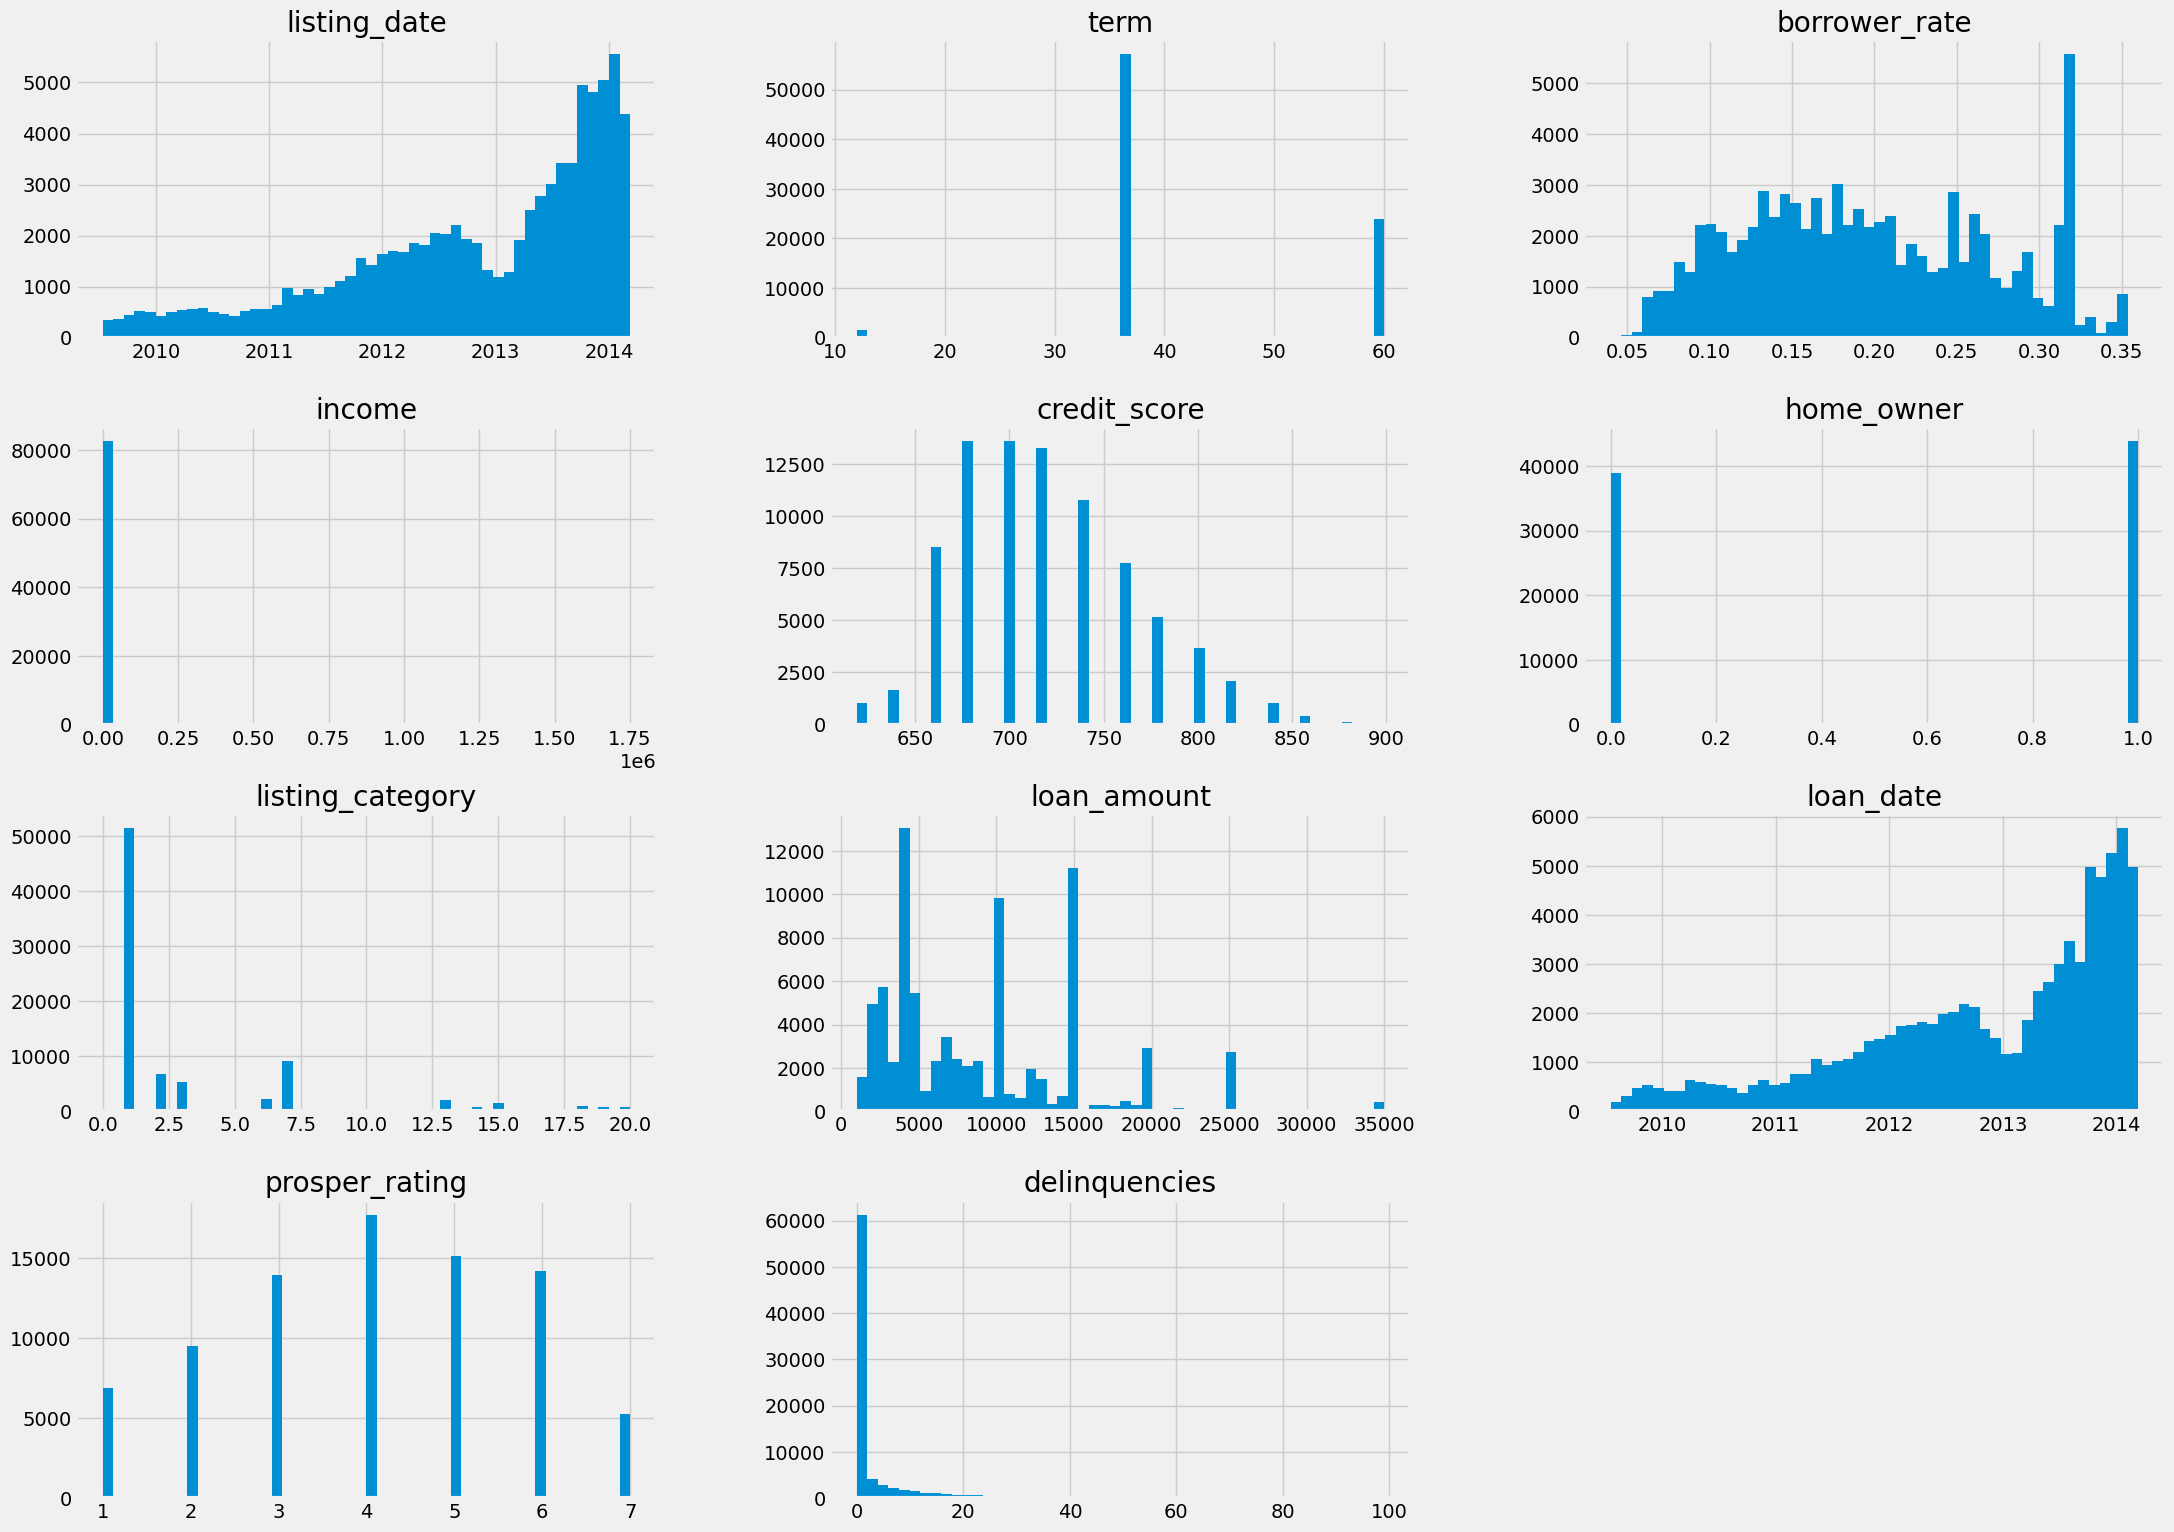

In [32]:
df.hist(bins=50, figsize=(24,18))
plt.show()


What do these charts mean?

We look in further at the columns: loan amount, prosper rating, credit score, borrower rate and listing date.
> The other column values are described as follows:
>Income and delinquencies are not suitable for this kind of chart so another chart will be used.
>House owner column has just two distinct values so you find two columns on its chart, representing 0 (meaning No) and 1 (meaning Yes).

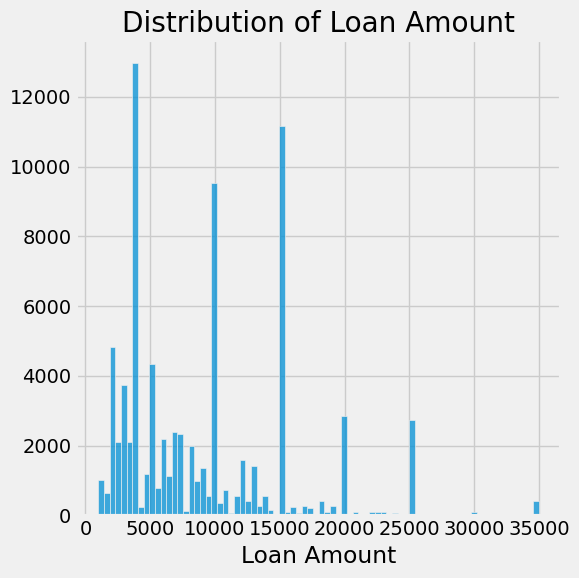

In [33]:
plt.figure(figsize=(6,6))

sns.histplot(
data=df, x='loan_amount'
)

plt.ylabel('')
plt.xlabel('Loan Amount')
plt.title('Distribution of Loan Amount')
plt.tight_layout()
plt.show()

From this chart, most of the loans are less than 10000, with the highest loan amount at just under 5000.

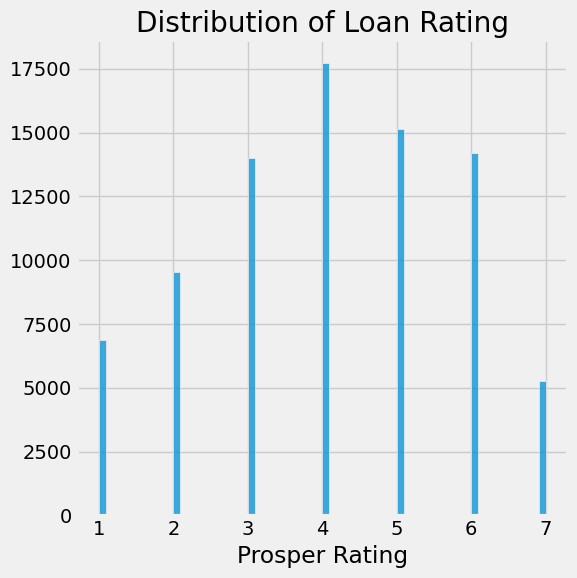

In [34]:
plt.figure(figsize=(6,6))

sns.histplot(
data=df, x='prosper_rating'
)

plt.ylabel('')
plt.xlabel('Prosper Rating')
plt.title('Distribution of Loan Rating')
plt.tight_layout()
plt.show()

The highest rating is 4 at 17728. The heights of the bars on the right are taller (ratings 5 and 6 at 15124 and 14186 respectively) than the bars on the left. So it seems that there are more people who repay their loan in good time than those who are either late or default.

The full result of the counts of the values are in the next cell.

In [35]:
df.prosper_rating.value_counts()

4    17728
5    15124
6    14186
3    13987
2     9547
1     6863
7     5273
Name: prosper_rating, dtype: int64

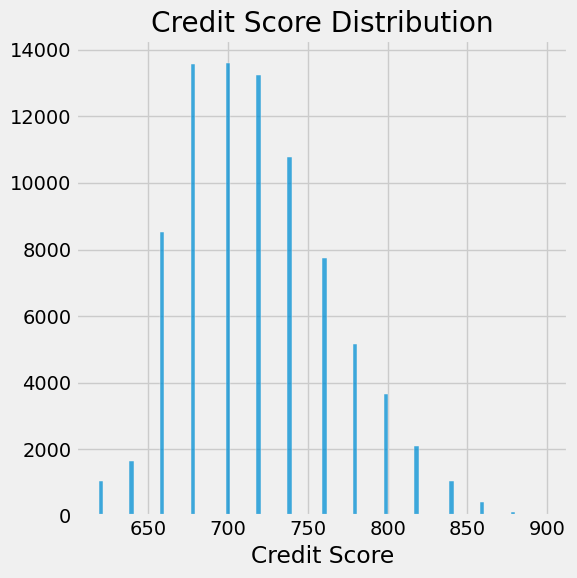

In [36]:
plt.figure(figsize=(6,6))

sns.histplot(
data=df, x='credit_score')

plt.ylabel('')
plt.xlabel('Credit Score')
plt.title('Credit Score Distribution')
plt.tight_layout()
plt.show()

The largest credit scores are clustered around 679 to 739.

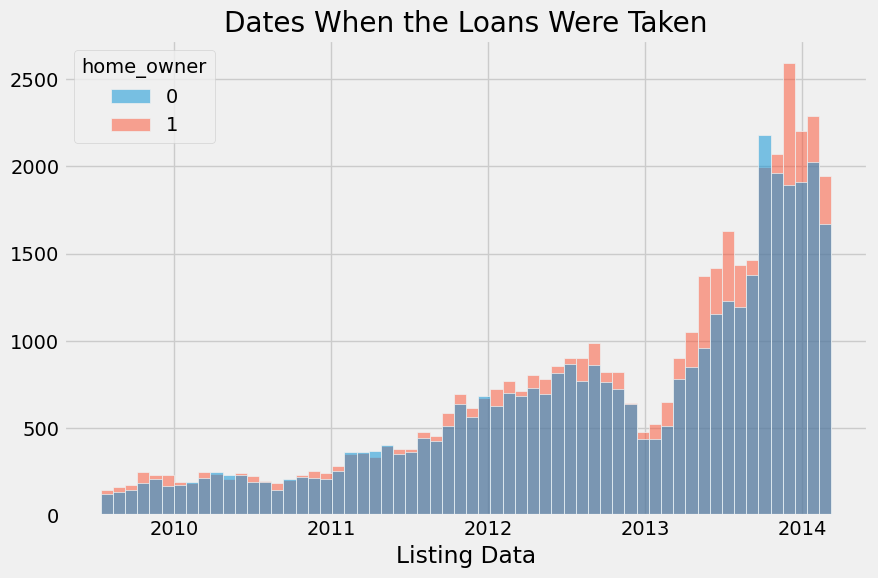

In [37]:
plt.figure(figsize=(9,6))

sns.histplot(
data=df, x='listing_date',
              hue='home_owner'
)

plt.ylabel('')
plt.xlabel('Listing Data')
plt.title('Dates When the Loans Were Taken')
plt.tight_layout()
plt.show()

Loans were less frequent until it began a steady rise in  2012, where it peaked in the second hal and then it began to drop until the first quarter of 2013.

It picked up in pace shortly after that and the number of loan takers rose to new heights.
Home owners are able to take more loans than those who are not home owners.

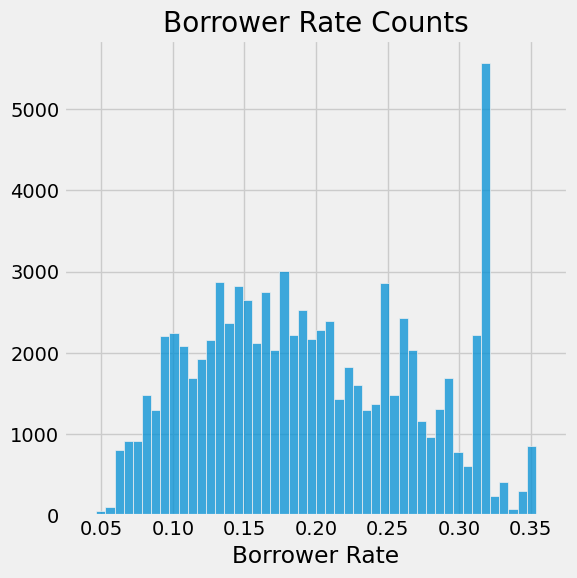

In [38]:
plt.figure(figsize=(6,6))

sns.histplot(data=df, bins=50,
x='borrower_rate')

plt.ylabel('')
plt.xlabel('Borrower Rate')
plt.title('Borrower Rate Counts')
plt.tight_layout()
plt.show()

There is a column that looks out of place and that will be investigated presently .

In [39]:
v=df.borrower_rate.mode().iloc[0]

df.borrower_rate.value_counts().loc[v]

3672

In [40]:
# Create the histogram using Plotly Express
fig = px.histogram(df, x='borrower_rate', nbins=100, title='Borrower Rate Counts')

fig.update_layout(
xaxis_title='Borrower Rate',
yaxis_title='',
title_font_size=20,
title_x=0.5,
title_y=0.9,
width=800,
height=500,
margin=dict(l=50, r=50, t=50, b=50),
)

fig.show()

### The distributions of the variables of interest.

> The columns chosen all showed varied information on the behaviour of loan takers. Home owners took more loans. Most loans taken where repaid and were mostly under 5000 USD.

### Unusual features observed:

> The unusual distribution among those that were observed, is the borrower rate. Between 0.315 and 0.325 is a peak. All other appearances appear normal except this one column.
It appears to be a source error.

## Bivariate Exploration

> This is where I investigate relationships between pairs of variables in the
data. The variables here have already been introduced in some way in the previous section (univariate exploration).

In [41]:
df_num = df.select_dtypes(include=np.number)

In [42]:
delinq_corr = df.select_dtypes(include=np.number).corr()

delinq_corr['delinquencies'].sort_values(ascending=False)

delinquencies       1.000000
borrower_rate       0.142552
listing_category    0.061619
income             -0.014215
term               -0.024468
home_owner         -0.061626
loan_amount        -0.106178
prosper_rating     -0.147266
credit_score       -0.214592
Name: delinquencies, dtype: float64

In [43]:
loanamt_corr = df.select_dtypes(include=np.number).corr()

loanamt_corr['loan_amount'].sort_values(ascending=False)

loan_amount         1.000000
prosper_rating      0.430138
term                0.341902
credit_score        0.277359
income              0.180714
home_owner          0.176087
delinquencies      -0.106178
listing_category   -0.204570
borrower_rate      -0.414910
Name: loan_amount, dtype: float64

In [44]:
income_corr = df.select_dtypes(include=np.number).corr()

income_corr['income'].sort_values(ascending=False)

income              1.000000
loan_amount         0.180714
home_owner          0.119676
prosper_rating      0.094029
credit_score        0.066189
term                0.008539
delinquencies      -0.014215
listing_category   -0.017093
borrower_rate      -0.094056
Name: income, dtype: float64

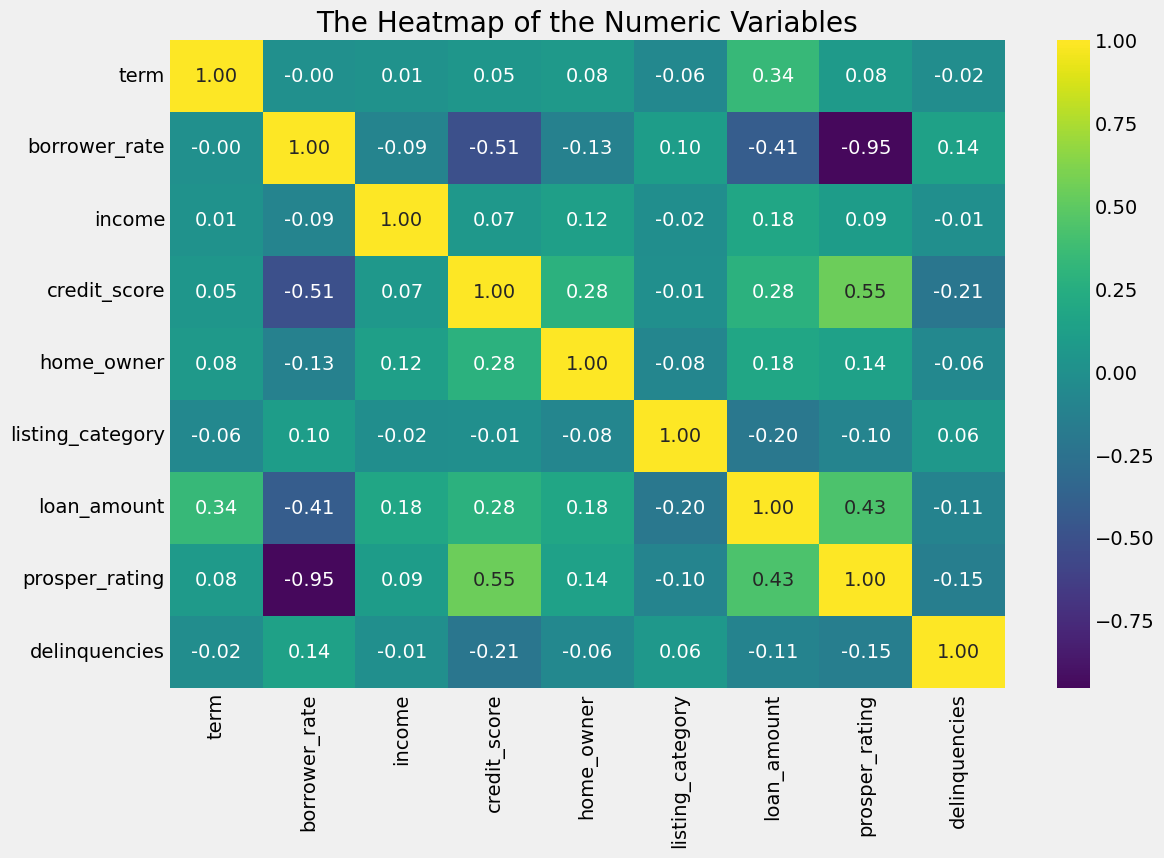

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(df_num.corr(), annot=True, fmt='.2f',cmap='viridis', center=0)
plt.title("The Heatmap of the Numeric Variables")
plt.show()

> This heatmap shows the relationship of each numeric pair. The closer to one the higher the pairs affect each other. This can be positive or negative. The closer they are to zero

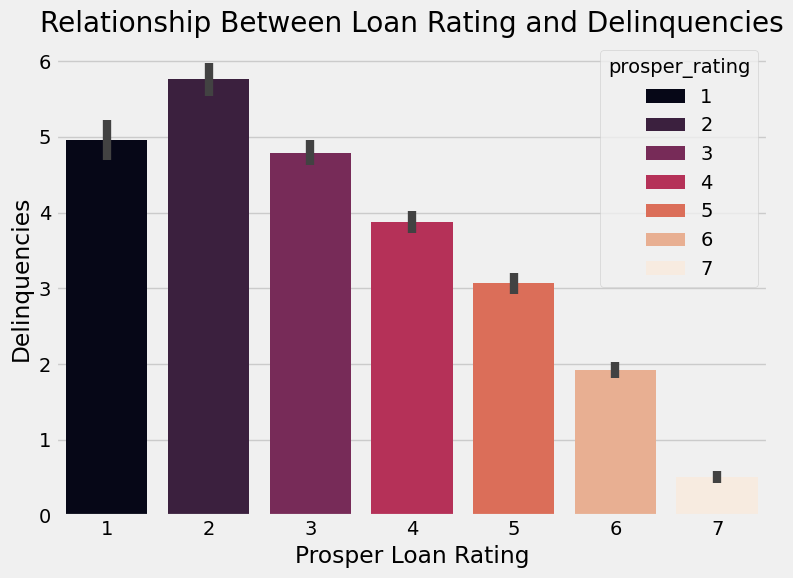

In [46]:
# Distribution of Delinquencies

plt.figure(figsize=(8,6))

#sns.set_theme(style='darkgrid')
sns.barplot(data=df, x='prosper_rating', y='delinquencies',
            color='b', palette='rocket', hue='prosper_rating')

plt.ylabel('Delinquencies')
plt.xlabel('Prosper Loan Rating')
plt.title('Relationship Between Loan Rating and Delinquencies')
plt.tight_layout()
plt.show()

> The individuals with a low rating have the highest delinquencies while those with a higher rating have the least delinquencies. The number of individuals with the rating of 2 happen to be the largest number of delinquents\.

    - Note how the correlation gotten above shows here. The higher the rating, the lower the chance of delinquency. It is negatively correlated.
    


### Question
Does income influence loan amount

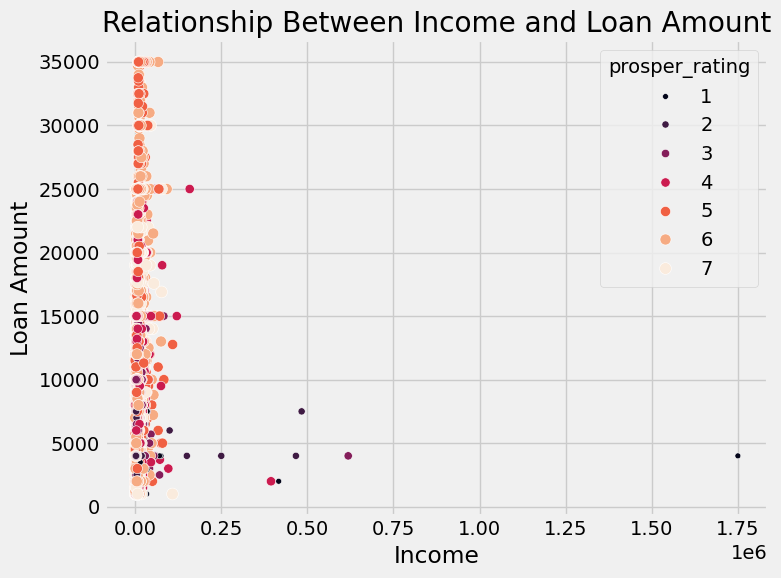

In [47]:
# Distribution of Delinquencies

plt.figure(figsize=(8,6))

#sns.set_theme(style='darkgrid')
sns.scatterplot(data=df, x='income', y='loan_amount',
            color='b', palette='rocket',
hue='prosper_rating',
#style='prosper_rating',
size='prosper_rating'
)

plt.ylabel('Loan Amount')
plt.xlabel('Income')
plt.title('Relationship Between Income and Loan Amount')
plt.tight_layout()
plt.show()

In [48]:
plt.figure(figsize=(24,18))
fig = px.scatter(df, x='income', y='loan_amount', color='prosper_rating',
                 color_continuous_scale='icefire_r',
                 labels={'income': 'Income', 'delinquencies': 'Delinquencies'},
                 title='Relationship Between Loan Rating and Delinquencies')
fig.update_layout(
    width=24 * 40,  # Set the width of the plot (40 pixels per unit)
    height=18 * 40  # Set the height of the plot (40 pixels per unit)
)

fig.update_layout(xaxis_title='Income', yaxis_title='Loan Amount')
fig.show()

<Figure size 2400x1800 with 0 Axes>


From the chart, there is scarcely any influence of income on loan amount. There is very little correlation between income and loan amount.

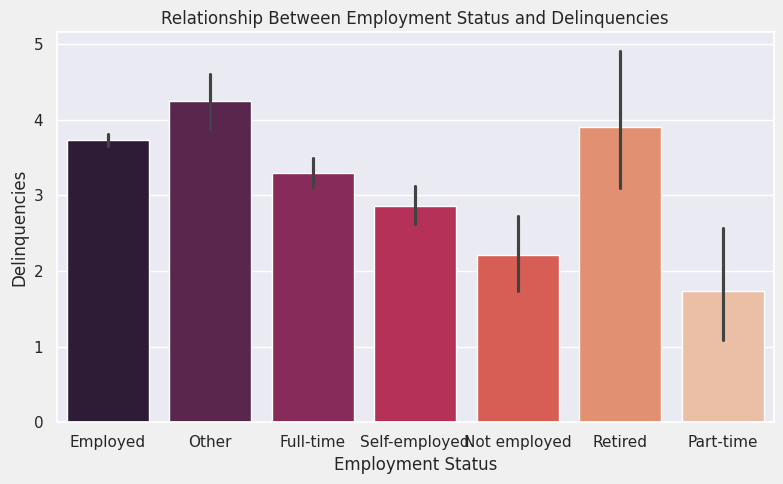

In [49]:
# Relationship between Loan Status and Delinquents

plt.figure(figsize=(8,5))

sns.set_theme(style='darkgrid')
sns.barplot(data=df, y='delinquencies', x='employment_status', hue='employment_status',
            color='b', palette='rocket')

plt.ylabel('Delinquencies')
plt.xlabel('Employment Status')
plt.title('Relationship Between Employment Status and Delinquencies')
plt.tight_layout()
plt.show()

The individuals in the other group have a higher number of default but the Retired group have a higher average.

Let's put all the late payments into the same bucket of past due

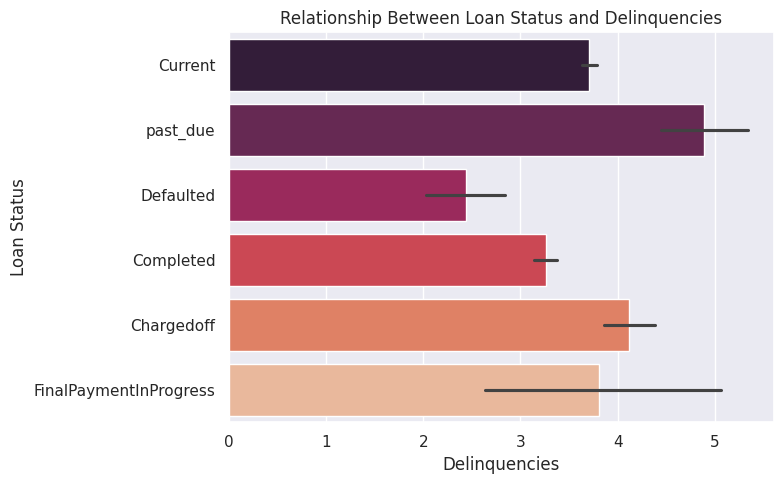

In [50]:
# Distribution of Loan Status
plt.figure(figsize=(8,5))

sns.set_theme(style='darkgrid')
sns.barplot(data=df, x='delinquencies', y='loan_status', hue = 'loan_status',
            color='b', palette='rocket')

plt.ylabel('Loan Status')
plt.xlabel('Delinquencies')
plt.title('Relationship Between Loan Status and Delinquencies')
plt.tight_layout()
plt.show()

The current and completed are the most stable on average. Those making the final payments and those past due have the most swing in their averages. In essence, the payments fluctuate a lot.

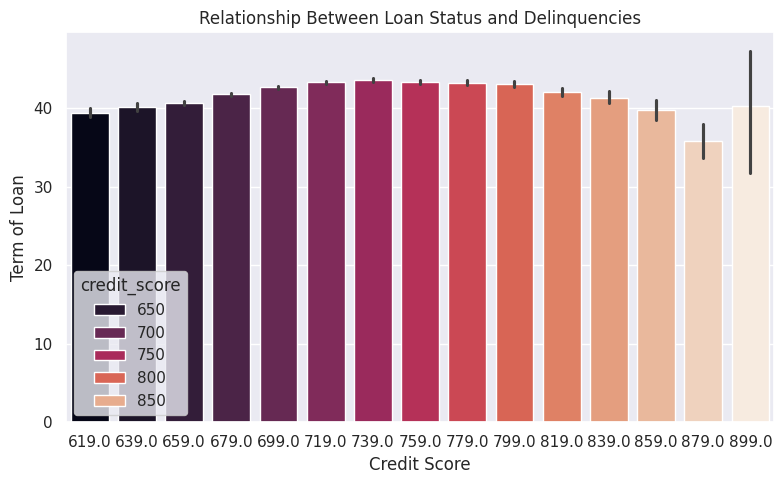

In [51]:

plt.figure(figsize=(8,5))

sns.set_theme(style='darkgrid')
sns.barplot(data=df, x='credit_score', y='term', hue='credit_score',
            color='b', palette='rocket')

plt.ylabel('Term of Loan')
plt.xlabel('Credit Score')
plt.title('Relationship Between Loan Status and Delinquencies')
plt.tight_layout()
plt.show()

In this chart, the higher credit scores have a higher average term than the lower credit scores with the highest scores having the longest terms

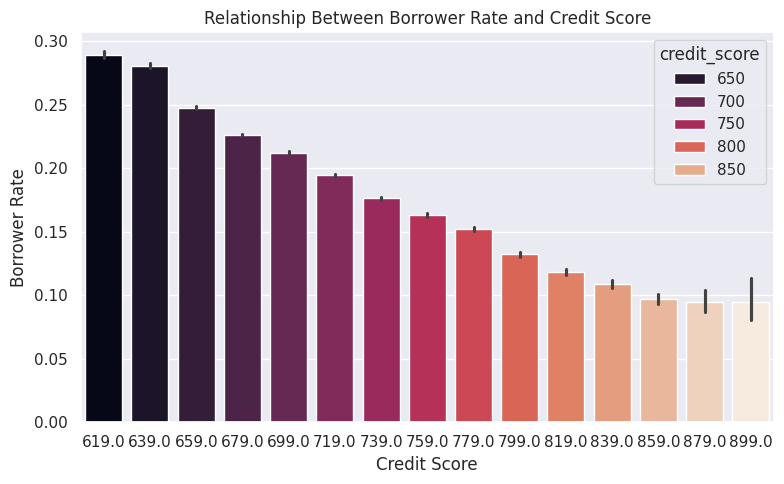

In [52]:
plt.figure(figsize=(8,5))

sns.set_theme(style='darkgrid')
sns.barplot(data=df, x='credit_score', y='borrower_rate',
hue='credit_score',
            color='b', palette='rocket')

plt.ylabel('Borrower Rate')
plt.xlabel('Credit Score')
plt.title('Relationship Between Borrower Rate and Credit Score')
plt.tight_layout()
plt.show()

The two highest credit scores have a high average center just under 10 borrower rate. The rate of borrowing reduces as the credit score increases.

In [53]:
loan = np.log(df.loan_amount)/10
loan

1         0.921034
3         0.921034
4         0.961581
5         0.961581
6         0.800637
            ...   
113932    0.921034
113933    0.760090
113934    0.921034
113935    0.961581
113936    0.760090
Name: loan_amount, Length: 82708, dtype: float64

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

## Conclusions
>The performance of the loan taken shows an upward trend in individuals taking more loans. There is room to expand the net simultaneously satisfying present and longstanding customers.
The loans taken are usually within 5000 USD. It might be profitable to make accessing it seamless.